# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (OneHotEncoder, KBinsDiscretizer, StandardScaler)

In [3]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
countries = pd.read_csv("countries.csv", thousands='.', decimal=',')

In [5]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [6]:
countries.shape

(227, 20)

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [7]:
# Sua análise começa aqui.

In [8]:
df = pd.DataFrame({ 'colunas' : countries.columns,
                    'tipos' : countries.dtypes,
                    'missing' : countries.isna().sum(),
                    'size' : countries.shape[0],
                    'unicos' : countries.nunique()}
                 )
df['missing_perc'] = (df['missing'] / df['size']).round(2)

In [9]:
df

,colunas,tipos,missing,size,unicos,missing_perc
Country,Country,object,0,227,227,0.00
Region,Region,object,0,227,11,0.00
Population,Population,int64,0,227,227,0.00
Area,Area,int64,0,227,226,0.00
Pop_density,Pop_density,float64,0,227,219,0.00
Coastline_ratio,Coastline_ratio,float64,0,227,151,0.00
Net_migration,Net_migration,float64,3,227,157,0.01
Infant_mortality,Infant_mortality,float64,3,227,220,0.01
GDP,GDP,float64,1,227,130,0.00
Literacy,Literacy,float64,18,227,140,0.08


In [10]:
# Maximo é 10% de valor faltante, creio que pode-se dropar NAs
#df_countries = countries.dropna()

In [11]:
# Copiar dataframe para nao fazer cagada
df_countries = countries.copy()

In [12]:
# Transformei direto da importação com: "pd.read_csv("countries.csv", thousands='.', decimal=',')"
df_countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

In [13]:
# Remover espaços com strip
df_countries['Country'] = df_countries['Country'].str.strip()
df_countries['Region'] = df_countries['Region'].str.strip()

In [14]:
# Strip funcionou?
#countries_notna['Country'][0], countries['Country'][0]
df_countries['Region'][0], countries['Region'][0]

('ASIA (EX. NEAR EAST)', 'ASIA (EX. NEAR EAST)         ')

In [15]:
df_countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [16]:
df_countries.shape

(227, 20)

### Exercicio 01

In [17]:
region_uni = df_countries['Region'].unique()

In [18]:
sorted(region_uni)

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [19]:
def q1():
    # Retorne aqui o resultado da questão 1.
    #Selecionar apenas os valores unicos de "countries['Region']"
    region_uni = df_countries['Region'].unique()
    return sorted(region_uni)

### Exercicio 02

In [20]:
def get_interval(bin_idx, bin_edges):
  return f"{np.round(bin_edges[bin_idx], 2):.2f} ⊢ {np.round(bin_edges[bin_idx+1], 2):.2f}"

In [21]:
# criando objeto discretizer com 10 intervalos (bins), usando estrategia 'quantile'
discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")

In [22]:
# treinando modelo 
discretizer.fit(df_countries[['Pop_density']])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [23]:
# gerando limites de intervalos
score_bins = discretizer.transform(df_countries[['Pop_density']])

In [24]:
# visualizando os intervalos gerados
discretizer.bin_edges_

array([array([0.00000e+00, 1.01400e+01, 2.12200e+01, 3.94800e+01, 5.98000e+01,
       7.88000e+01, 1.05540e+02, 1.50120e+02, 2.53700e+02, 3.96740e+02,
       1.62715e+04])], dtype=object)

In [25]:
# confirmando numero de intervalos gerados
len(discretizer.bin_edges_[0])-1

10

In [26]:
#somando apenas os dados que estão acima do 90o percentilsub
sum(score_bins[:, 0] == 9)

23

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [27]:
def q2():
    # Retorne aqui o resultado da questão 2.

    # criando objeto discretizer com 10 intervalos (bins), usando estrategia 'quantile'
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    # treinando modelo 
    discretizer.fit(df_countries[['Pop_density']])
    # gerando limites de intervalos
    score_bins = discretizer.transform(df_countries[['Pop_density']])
    # visualizando os intervalos gerados
    discretizer.bin_edges_
    #somando apenas os dados que estão acima do 90o percentilsub
    return int (sum(score_bins[:, 0] == 9))

### Exercicio 03

In [28]:
# criar objeto de OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int64)

In [29]:
# Preenchendo valores nulos de 'Climate'
df_countries['Climate'].fillna(0, inplace=True)

In [30]:
# Treinar e transformar (encodar) os atributos 'Region' e 'Climate'
encoded = one_hot_encoder.fit_transform(df_countries[['Region','Climate']])

In [31]:
# atributos criados durante o treino e transformacao
new_atributes = encoded.shape[1]

In [32]:
new_atributes

18

## Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [33]:
def q3():
    # Retorne aqui o resultado da questão 3.

    # criar objeto de OneHotEncoder
    one_hot_encoder = OneHotEncoder(sparse=False)
    # Preenchendo valores nulos de 'Climate'
    df_countries['Climate'].fillna(0, inplace=True)
    # Treinar e transformar (encodar) os atributos 'Region' e 'Climate'
    encoded = one_hot_encoder.fit_transform(df_countries[['Region','Climate']])
    # atributos criados durante o treino e transformacao
    new_atributes = encoded.shape[1]
    return int(new_atributes)

### Exercicio 04

In [34]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [35]:
# criar pipeline
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("standard_scaler", StandardScaler())
])

In [36]:
# selecionar apenas atributos numericos
numeric_atributes = countries.describe().columns.tolist()

In [37]:
# aplicar pipeline sobre dados de treino (fit & transform) | retorna lista
pipeline_transformation = num_pipeline.fit_transform(df_countries[numeric_atributes])

In [38]:
# Transformar lista em um DataFrame e testar
df_test_country = pd.DataFrame([test_country], columns = df_countries.columns)

df_test_country.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [39]:
# Aplicar pipeline sobre o df, apenas nas colunas numericas
test_country_transformation = num_pipeline.transform(df_test_country[numeric_atributes])

In [40]:
# Criando df dos dados transformados para pegar apenas 'Arable'
df_test_country_pipeline = pd.DataFrame(test_country_transformation, columns = df_countries.select_dtypes(include=[np.number]).columns)

In [41]:
df_test_country_pipeline['Arable'].round(3)

0   -1.047
Name: Arable, dtype: float64

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [42]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [43]:
def q4():
    # Retorne aqui o resultado da questão 4.
    
    # criar pipeline
    num_pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("standard_scaler", StandardScaler())
    ])
    # selecionar apenas atributos numericos
    numeric_atributes = countries.describe().columns.tolist()
    # aplicar pipeline sobre dados de treino (fit & transform) | retorna lista
    pipeline_transformation = num_pipeline.fit_transform(df_countries[numeric_atributes])
    # Transformar lista em um DataFrame e testar
    df_test_country = pd.DataFrame([test_country], columns = df_countries.columns)
    df_test_country.head()
    # Aplicar pipeline sobre o df, apenas nas colunas numericas
    test_country_transformation = num_pipeline.transform(df_test_country[numeric_atributes])
    # Criando df dos dados transformados para pegar apenas 'Arable'
    df_test_country_pipeline = pd.DataFrame(test_country_transformation, columns = df_countries.select_dtypes(include=[np.number]).columns)
    return float(df_test_country_pipeline['Arable'].round(3))

### Exercicio 05

In [98]:
# selecionar apenas colunas net_migration
net_migration_outliers = df_countries['Net_migration'].dropna().copy()

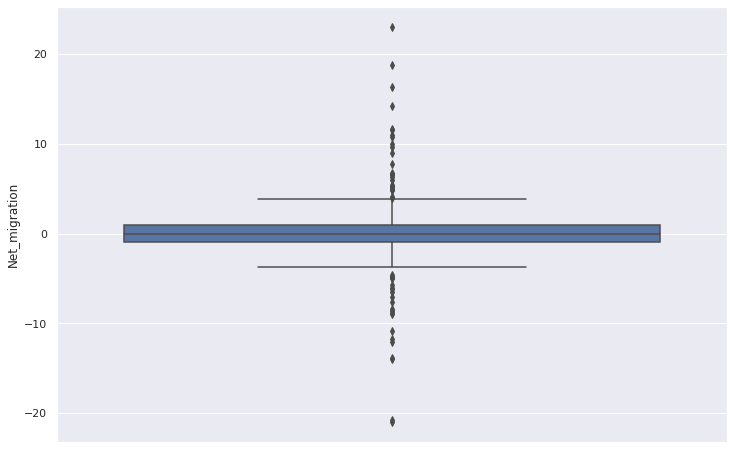

In [99]:
# plotando grafico boxplot da variavel
sns.boxplot(net_migration_outliers, orient="vertical");

In [100]:
# Descobrindo o intervalo em que os dados são normais
quantil1 = net_migration_outliers.quantile(0.25)
quantil3 = net_migration_outliers.quantile(0.75)
iqr = quantil3 - quantil1

non_outlier_interval_iqr = [(quantil1 - 1.5 * iqr), (quantil3 + 1.5 * iqr)]

In [101]:
non_outlier_interval_iqr

[-3.8149999999999995, 3.885]

In [103]:
# Descobrindo outliers do atributo 'net_migration'
amount_lower_outliers = net_migration_outliers[(net_migration_outliers < non_outlier_interval_iqr[0]).sum()]
outliers_abaixo = net_migration_outliers[(net_migration_outliers < non_outlier_interval_iqr[0])]

amount_higher_outliers = net_migration_outliers[(net_migration_outliers > non_outlier_interval_iqr[1]).sum()]
outliers_acima = net_migration_outliers[(net_migration_outliers > non_outlier_interval_iqr[1])]

In [104]:
len(outliers_abaixo), len(net_migration_outliers)

(24, 224)

In [105]:
# devo desconsiderar os outliers?
drop_outliers = bool((amount_lower_outliers/len(net_migration_outliers)) > .05 or ((amount_higher_outliers/len(net_migration_outliers)) > .05))

In [107]:
len(outliers_abaixo), len(outliers_acima), drop_outliers

(24, 26, False)

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [109]:
def q5():
    # Retorne aqui o resultado da questão 5.

    # selecionar apenas colunas net_migration
    net_migration_outliers = df_countries['Net_migration'].dropna().copy()
    # plotando grafico boxplot da variavel
    sns.boxplot(net_migration_outliers, orient="vertical");
    # Descobrindo o intervalo em que os dados são normais
    quantil1 = net_migration_outliers.quantile(0.25)
    quantil3 = net_migration_outliers.quantile(0.75)
    iqr = quantil3 - quantil1

    non_outlier_interval_iqr = [(quantil1 - 1.5 * iqr), (quantil3 + 1.5 * iqr)]
    # Descobrindo outliers do atributo 'net_migration'
    amount_lower_outliers = net_migration_outliers[(net_migration_outliers < non_outlier_interval_iqr[0]).sum()]
    outliers_abaixo = net_migration_outliers[(net_migration_outliers < non_outlier_interval_iqr[0])]

    amount_higher_outliers = net_migration_outliers[(net_migration_outliers > non_outlier_interval_iqr[1]).sum()]
    outliers_acima = net_migration_outliers[(net_migration_outliers > non_outlier_interval_iqr[1])]
    # devo desconsiderar os outliers?
    drop_outliers = bool((amount_lower_outliers/len(net_migration_outliers)) > .05 or ((amount_higher_outliers/len(net_migration_outliers)) > .05))
    return len(outliers_abaixo), len(outliers_acima), drop_outliers

### Exercicio 06

In [52]:
# carregando categorias e o dataset
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [53]:
# documento total
len(newsgroups.data)

1773

In [54]:
# transformacao por contagem de palavras - criando obj. de CountVectorizer()
count_vectorizer = CountVectorizer()
newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)
type(newsgroups_counts)

scipy.sparse.csr.csr_matrix

In [55]:
# selecionando todas palavras 
words = pd.DataFrame(newsgroups_counts.toarray(), columns=count_vectorizer.get_feature_names())

In [56]:
# somando apenas 'phones'
words['phone'].sum()

213

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [57]:
def q6():
    # Retorne aqui o resultado da questão 6.

    # carregando categorias e o dataset
    categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
    newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
    # transformacao por contagem de palavras - criando obj. de CountVectorizer()
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)
    type(newsgroups_counts)
    # selecionando todas palavras 
    words = pd.DataFrame(newsgroups_counts.toarray(), columns=count_vectorizer.get_feature_names())
    return int(words['phone'].sum())

### Exercicio 07

In [58]:
# criando objeto de TfidfVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [59]:
# treinando o modelo
newsgroups_tfidf_vectorized = tfidf_vectorizer.fit_transform(newsgroups.data)

In [60]:
# criando uma dataframe para selecionar dado
newsgroups_tfidf = pd.DataFrame(newsgroups_tfidf_vectorized.toarray(), columns=tfidf_vectorizer.get_feature_names())

In [61]:
newsgroups_tfidf['phone'].sum().round(3)

8.888

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [62]:
def q7():
    # Retorne aqui o resultado da questão 7.
    
    # criando objeto de TfidfVectorizer()
    tfidf_vectorizer = TfidfVectorizer()
    # treinando o modelo
    newsgroups_tfidf_vectorized = tfidf_vectorizer.fit_transform(newsgroups.data)
    # criando uma dataframe para selecionar dado
    newsgroups_tfidf = pd.DataFrame(newsgroups_tfidf_vectorized.toarray(), columns=tfidf_vectorizer.get_feature_names())
    return float(newsgroups_tfidf['phone'].sum().round(3))